<a href="https://colab.research.google.com/github/anselmoaxo/clalssificador_sentimento_comentarios/blob/main/classificador_sentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hugging Face : NLP (Natural Language Processing) é um campo da inteligência artificial que se concentra na interação entre computadores e humanos por meio da linguagem natural. Envolve o desenvolvimento de algoritmos que permitem que máquinas leiam, interpretem e gerem linguagem de forma que seja compreensível e útil para os humanos.

In [1]:
from transformers import pipeline

In [5]:
classificador_sentimento = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


* Sentimento Negativo em Inglês
* It didn't meet my expectations at all.

In [8]:
classificador_sentimento("It didn't meet my expectations at all.")

[{'label': 'NEGATIVE', 'score': 0.9997645020484924}]

* Classificando um sentimento Positivo em Inglês
* I love You

In [9]:
classificador_sentimento("I love You")

[{'label': 'POSITIVE', 'score': 0.9998656511306763}]

# Utilizando pysentimiento do Hugging Face

In [11]:
# instalando pyssentimiento
! pip install pysentimiento

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00


In [12]:
from pysentimiento import create_analyzer


In [13]:
model_analise_sentimento = create_analyzer(task="sentiment", lang="pt")


config.json:   0%|          | 0.00/952 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/799k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [15]:
# comentario Positivo
model_analise_sentimento.predict('''
Estou super satisfeito com a fritadeira!
Ela é muito fácil de usar e as receitas ficam deliciosas. As batatas fritas saem crocantes e
sem excesso de óleo, o que é perfeito para quem quer uma alimentação mais saudável. Recomendo demais!
''')

AnalyzerOutput(output=POS, probas={POS: 0.988, NEU: 0.009, NEG: 0.003})

In [16]:
# Comentario Neutro
model_analise_sentimento.predict('''
A fritadeira faz o que promete, mas não achei nada de excepcional. Ela cumpre bem o papel,
mas demora um pouco mais para preparar alguns alimentos do que eu esperava. Funciona bem,
mas poderia ser mais rápida.
''')

AnalyzerOutput(output=NEU, probas={NEU: 0.539, NEG: 0.392, POS: 0.069})

In [17]:
# comentario Negativo
model_analise_sentimento.predict('''
Péssima experiência com essa fritadeira. O produto esquenta demais e, em algumas vezes,
desligou sozinho no meio do preparo. Além disso, as peças parecem frágeis e já começaram
 a apresentar desgaste em menos de um mês de uso. Não recomendo
''')

AnalyzerOutput(output=NEG, probas={NEG: 0.988, NEU: 0.008, POS: 0.004})

# Buscando Arquivo csv de resenhas no github

* url: 'https://raw.githubusercontent.com/alura-cursos/hugging_face/refs/heads/main/Dados/resenhas.csv

In [18]:
import pandas as pd

In [19]:
url = 'https://raw.githubusercontent.com/alura-cursos/hugging_face/refs/heads/main/Dados/resenhas.csv'

In [20]:
dados_comentarios = pd.read_csv(url)

In [21]:
dados_comentarios.head()

,ID,Resenha
0,24,"A fritadeira é sensacional, muito além do que ..."
1,733,"Após usar o produto, achei-o fácil e muito efi..."
2,865,"Muito funcional, prática e moderna."
3,809,"Boa, mas não das melhores pois a frente de vid..."
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...


* Analisando os sentimentos

In [22]:
resultado_previsao = model_analise_sentimento.predict(dados_comentarios['Resenha'])

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

In [23]:
resultado_previsao

[AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.009, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.670, NEU: 0.320, NEG: 0.011}),
 AnalyzerOutput(output=POS, probas={POS: 0.900, NEU: 0.097, NEG: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.731, NEU: 0.259, POS: 0.010}),
 AnalyzerOutput(output=POS, probas={POS: 0.976, NEU: 0.021, NEG: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.956, NEU: 0.037, NEG: 0.007}),
 AnalyzerOutput(output=POS, probas={POS: 0.838, NEU: 0.093, NEG: 0.069}),
 AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.008, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.961, NEU: 0.036, NEG: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.007, NEG: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.100, POS: 0.004}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.990, NEU: 0.008, POS: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.003}),
 AnalyzerOutput(output=NEU, probas={NE

In [27]:
sentimento = []
for resultado in resultado_previsao:
  sentimento.append(resultado.output)

# criando coluna no DataFrame sentimento
dados_comentarios['Sentimento'] = sentimento

dados_comentarios


,ID,Resenha,sentimento,Sentimento
0,24,"A fritadeira é sensacional, muito além do que ...",POS,POS
1,733,"Após usar o produto, achei-o fácil e muito efi...",POS,POS
2,865,"Muito funcional, prática e moderna.",POS,POS
3,809,"Boa, mas não das melhores pois a frente de vid...",NEG,NEG
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...,POS,POS
5,657,"Usei ela algumas vezes já, muito silenciosa, l...",POS,POS
6,182,"Superou minhas expectativas, por enquanto tudo...",POS,POS
7,815,"Chegou no prazo. Amei, é muito linda. Não vejo...",POS,POS
8,343,"Estou muito satisfeito com a negociação, receb...",POS,POS
9,624,Lindaaaa amei super indico,POS,POS


# Plotando um gráfico de quantidade de resenhas por sentimento

In [28]:
import plotly.express as px

df_sentimento = dados_comentarios.groupby('Sentimento').size().reset_index(name='Contagem')

fig = px.bar(df_sentimento, x='Sentimento', y='Contagem', title='Quantidade de Resenhas por Sentimento')
fig.show()


# Nuvem de palavras (do inglês "word cloud").
Ela é, basicamente, uma imagem que serve para mostrar as palavras que mais se repetem em um conjunto de textos. Quanto mais vezes uma palavra aparecer, maior será o seu tamanho na figura

In [29]:
import nltk
from nltk.corpus import stopwords

In [30]:
nltk.download('stopwords')
portuguese_stopwords = set(stopwords.words('portuguese'))
portuguese_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
def nuvem_palavras(texto, coluna_texto, sentimento):
    # Filtrando as resenhas com base no sentimento especificado
    texto_sentimento = texto.query(f"Sentimento == '{sentimento}'")[coluna_texto]

    # Unindo todas as resenhas em uma única string
    texto_unido = " ".join(texto_sentimento)

    # Dividindo o texto em palavras e filtrando com stopwords
    palavras = texto_unido.split()
    palavras_filtradas = [palavra for palavra in palavras if palavra not in portuguese_stopwords]
    texto_filtrado = " ".join(palavras_filtradas)

    # Criando e exibindo a nuvem de palavras
    nuvem_palavras = WordCloud(width=800, height=500, max_words=50).generate(texto_filtrado)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

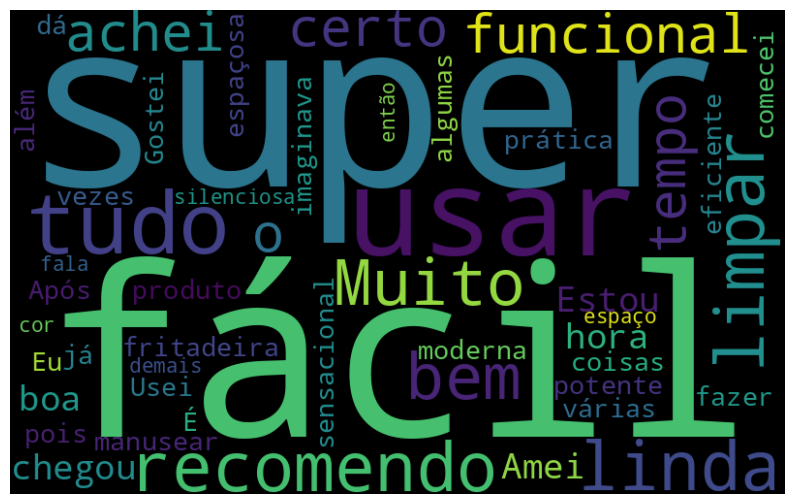

In [36]:
# Executando Nuvens de palvras para comentarios Positivos
nuvem_palavras(dados_comentarios, 'Resenha', 'POS')

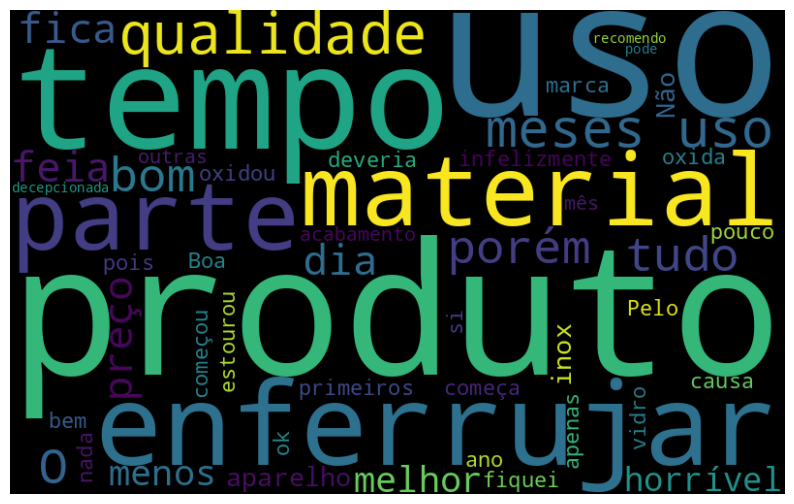

In [37]:
# Executando Nuvens de palvras para comentarios Negativos
nuvem_palavras(dados_comentarios, 'Resenha', 'NEG')

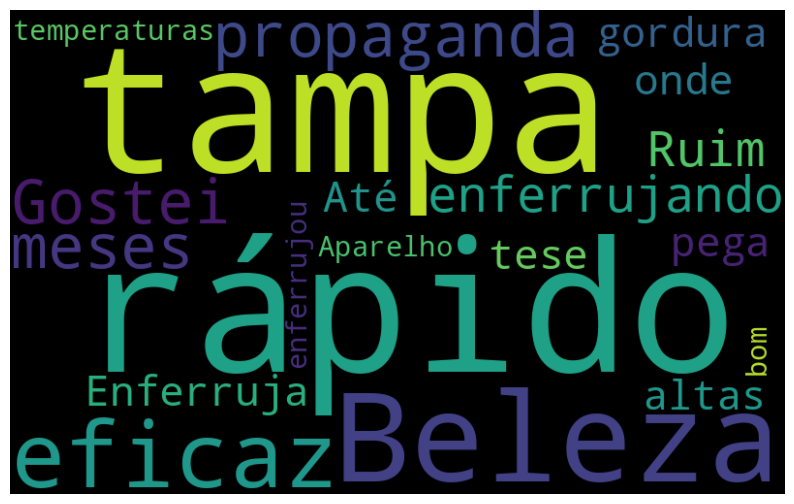

In [38]:
# Executando Nuvens de palvras para comentarios Neutro
nuvem_palavras(dados_comentarios, 'Resenha', 'NEU')